In [20]:
#importing all Library

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

#from sklearn.externals import joblib

from sklearn.decomposition import PCA

from scipy.stats import zscore

In [21]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
df.shape

(18249, 14)

In [23]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [25]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

<AxesSubplot:>

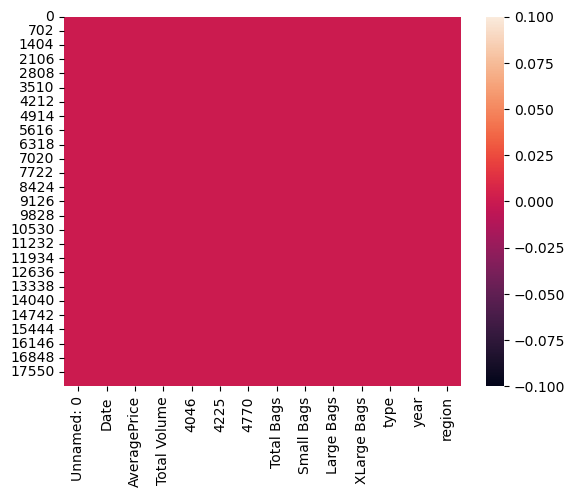

In [26]:
#checking null values using heatmap
sns.heatmap(df.isnull())

In [28]:
#finding how much type of avacado is sell in last 4 years
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [29]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

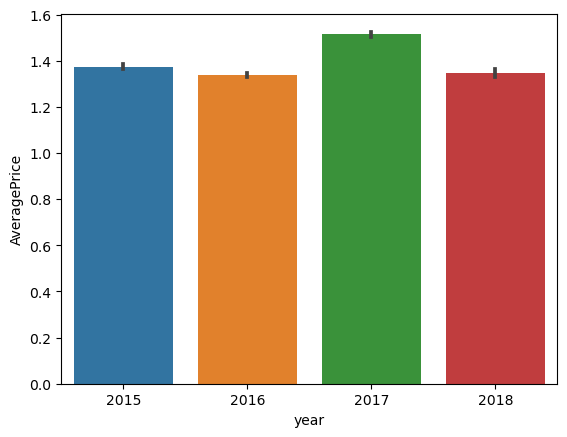

In [31]:
#ratio of year and price that which year had max average price
sns.barplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

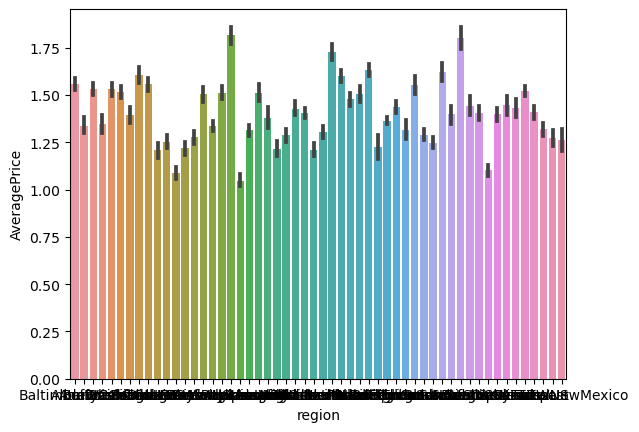

In [34]:
#checking ratio of region and price that which year had max average price
sns.barplot(x="region",y="AveragePrice",data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

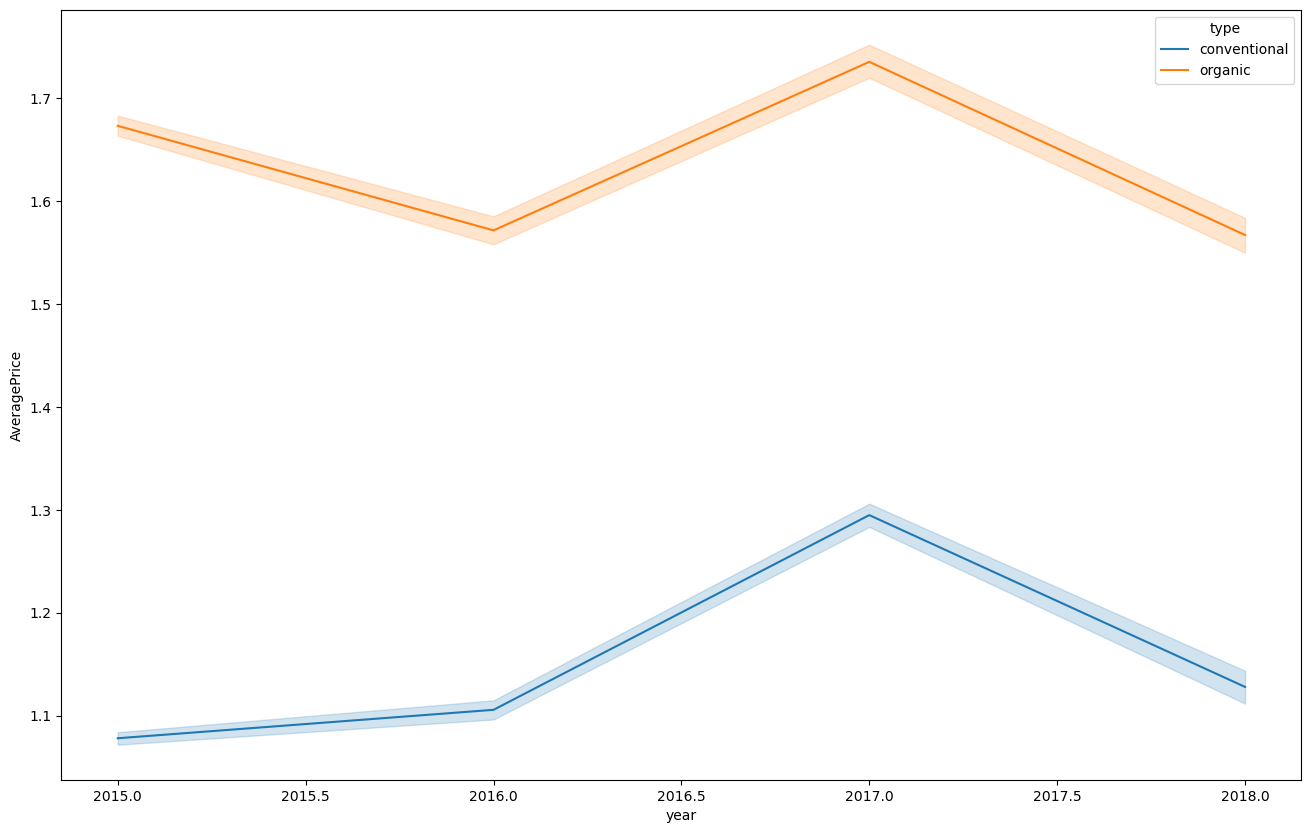

In [36]:
plt.figure(figsize=(16,10))
sns.lineplot(x="year",y="AveragePrice",hue='type',data=df)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

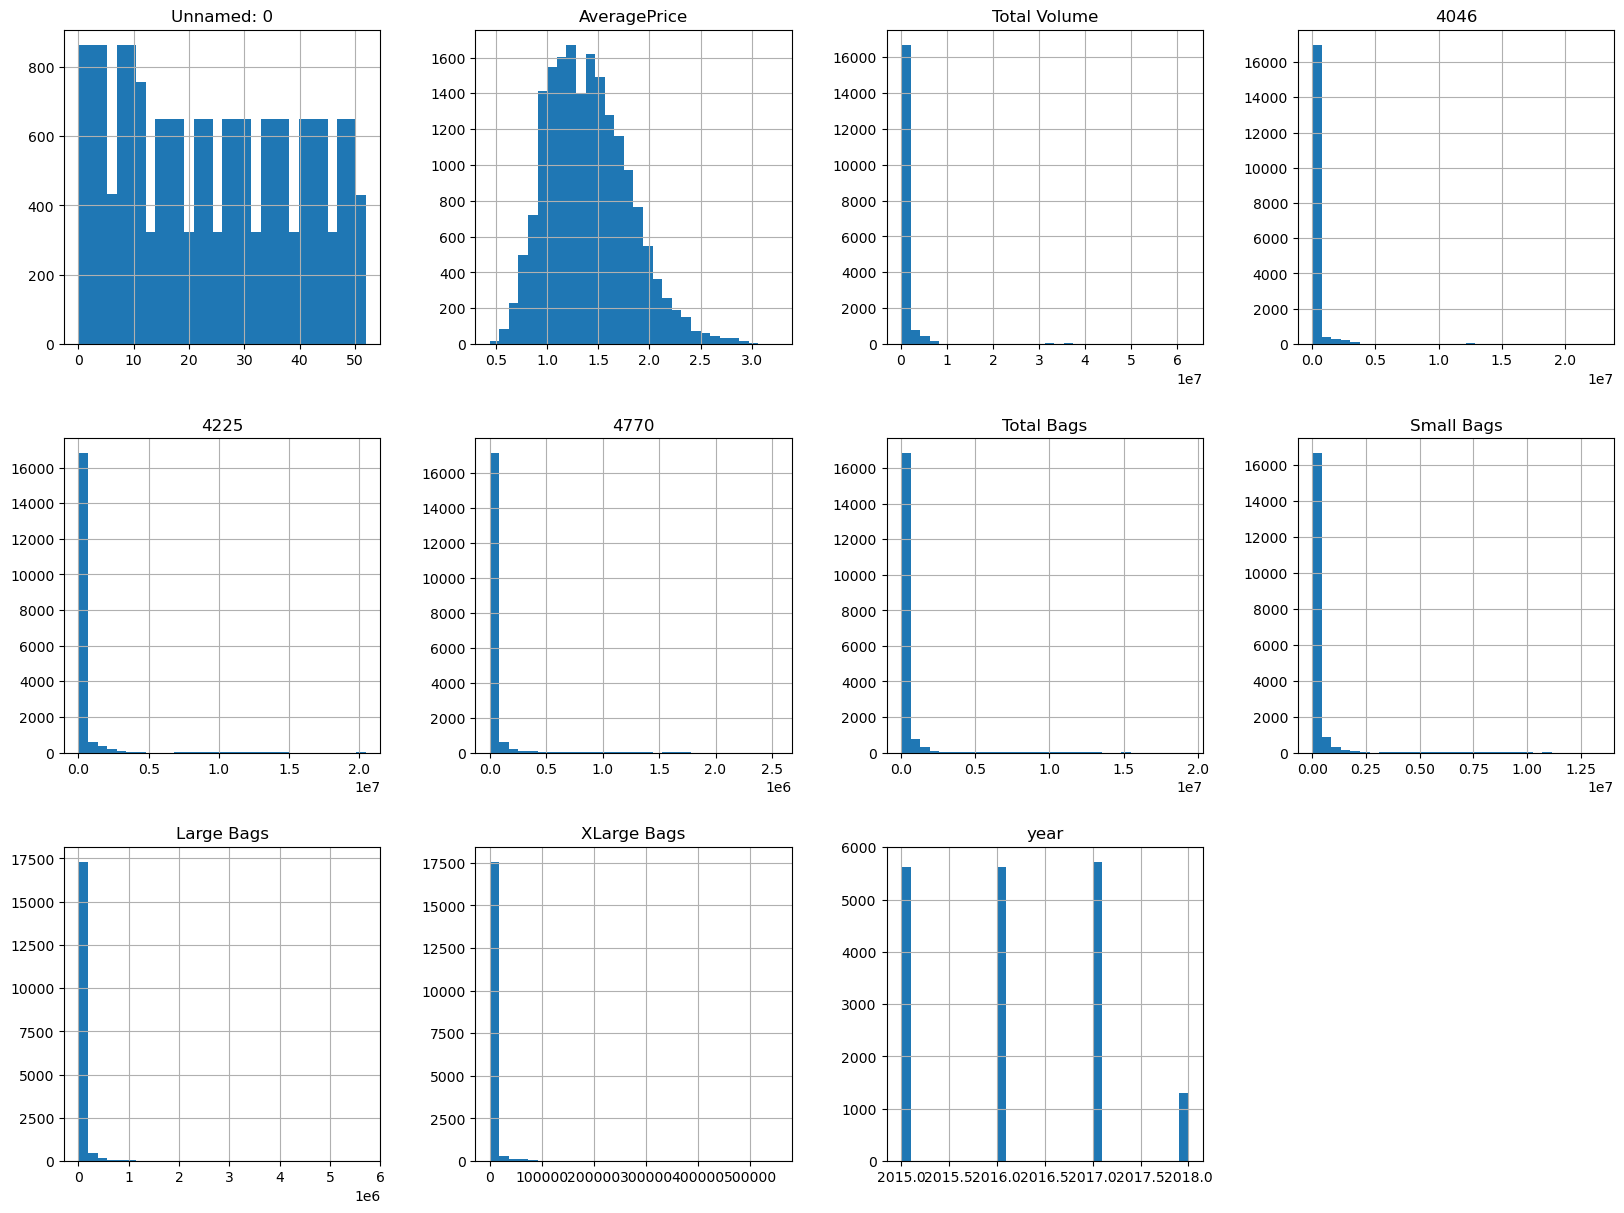

In [37]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [38]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [41]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Unnamed: 0         AxesSubplot(0.125,0.712609;0.133621x0.167391)
AveragePrice    AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Total Volume     AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4046            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
4225            AxesSubplot(0.766379,0.712609;0.133621x0.167391)
4770               AxesSubplot(0.125,0.511739;0.133621x0.167391)
Total Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Small Bags       AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Large Bags      AxesSubplot(0.606034,0.511739;0.133621x0.167391)
XLarge Bags     AxesSubplot(0.766379,0.511739;0.133621x0.167391)
year                AxesSubplot(0.125,0.31087;0.133621x0.167391)
dtype: object

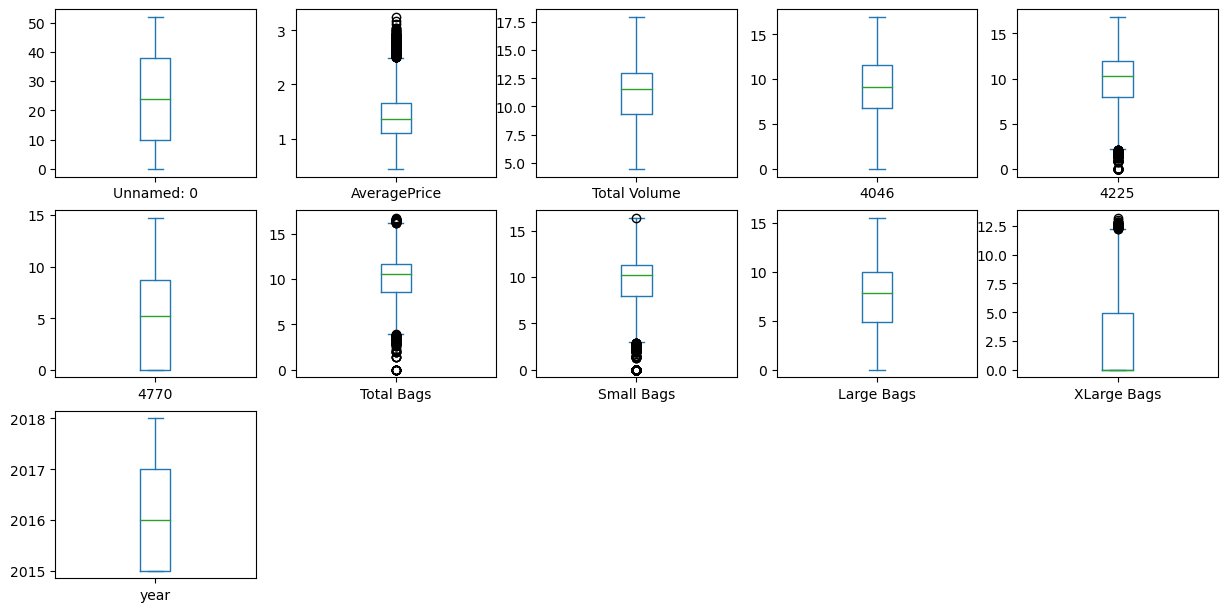

In [44]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [48]:
#calculate the zscore

from scipy.stats import zscore

# Create a DataFrame containing only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate z-scores for numeric columns
z = np.abs(zscore(numeric_df))
print(z)

       Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0        1.565327      0.188689      0.107282  0.609752  0.374936  0.279143   
1        1.500730      0.139020      0.175949  0.737707  0.305200  0.233838   
2        1.436133      1.182069      0.158690  0.688840  0.618892  0.042078   
3        1.371536      0.809551      0.017121  0.583598  0.472808  0.181974   
4        1.306939      0.312861      0.207558  0.638425  0.298852  0.171717   
...           ...           ...           ...       ...       ...       ...   
18244    1.113149      0.556347      0.685006  0.407310  0.878279  1.217613   
18245    1.048552      0.755023      0.775077  0.568306  0.594835  1.217613   
18246    0.983955      1.152375      0.778901  0.568251  0.712597  0.370548   
18247    0.919358      1.301382      0.707798  0.494407  0.644192  0.370240   
18248    0.854761      0.531512      0.674542  0.304151  0.726698  0.087895   

       Total Bags  Small Bags  Large Bags  XLarge B

In [49]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 14)


In [50]:
#assign the value to the df_new which are less than threshold value and removing the outliers
df_new=df[(z<3).all(axis=1)]

In [51]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing outliers',df.shape)

(18249, 14)
(17834, 14)
Shape after removing outliers (17834, 14)


[]

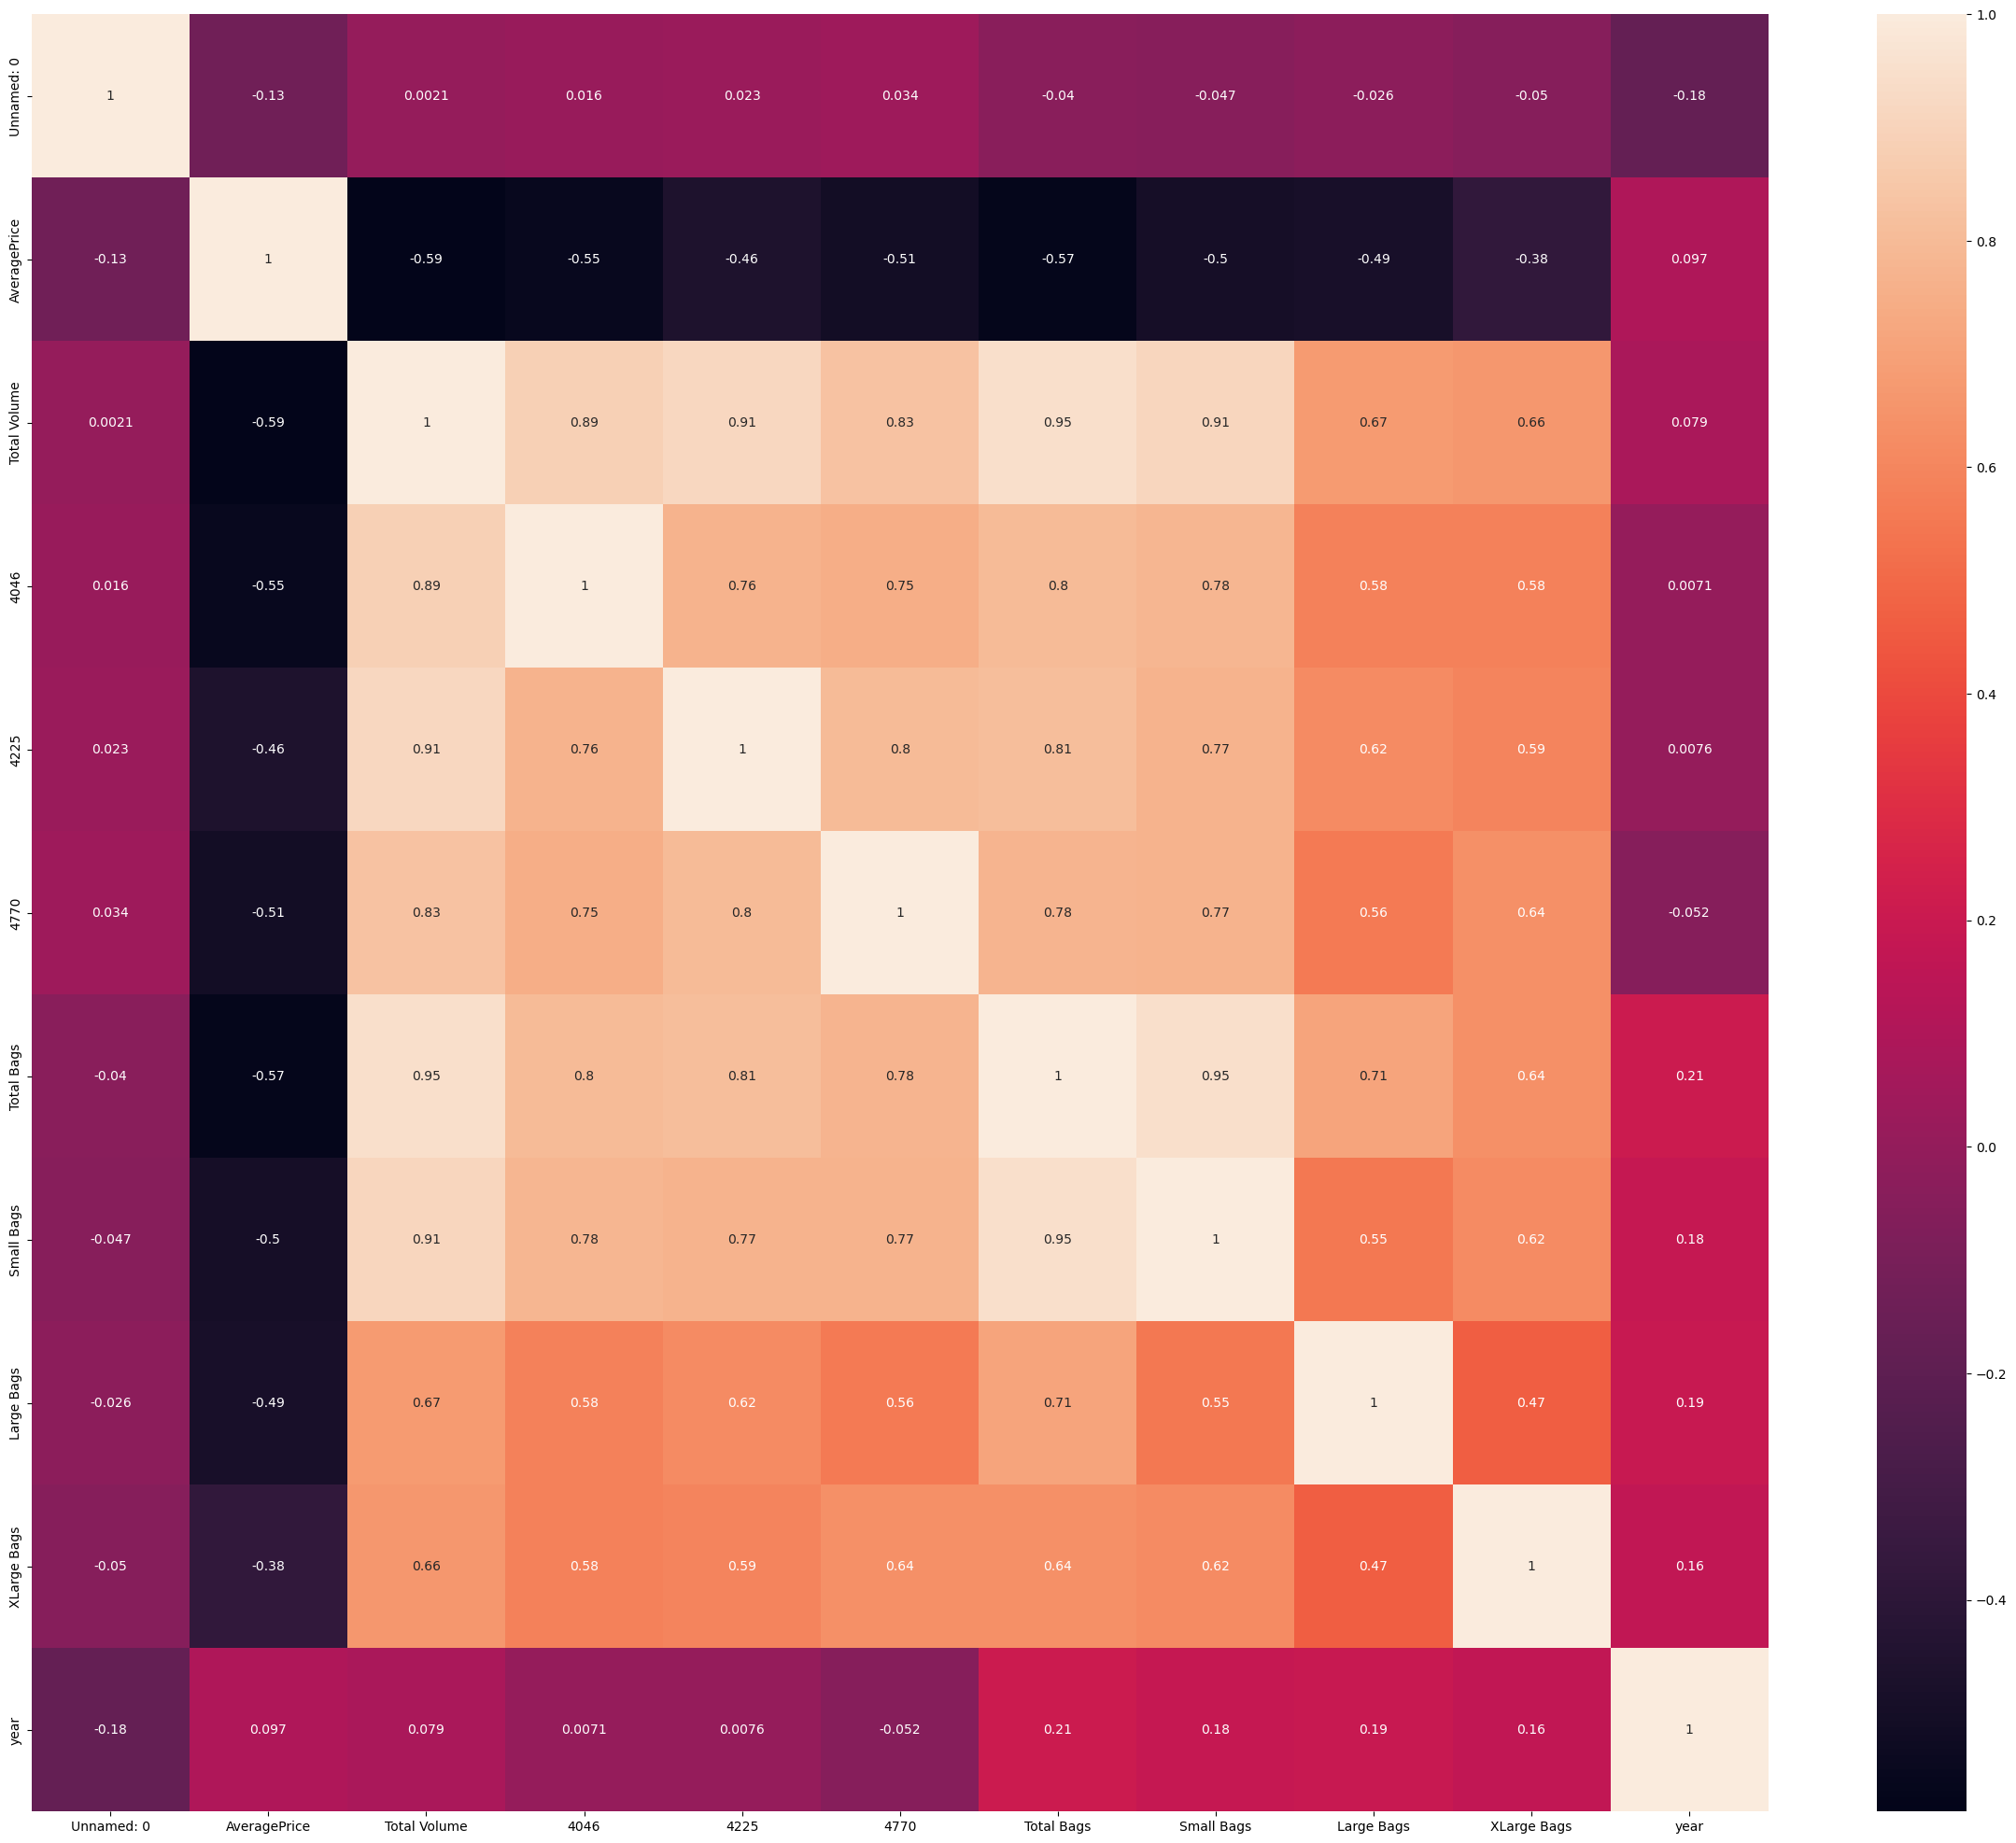

In [52]:
#calculation matrix
df_cor=df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [66]:
#prediction with Average Price
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("avocado.csv")

# Encode 'type' column
#df = pd.get_dummies(df, columns=['type'], drop_first=True)
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)
# Assuming 'x' are your features and 'y' is your target variable
x = df.drop(columns=['AveragePrice', 'Date'])  # Exclude non-numeric columns (e.g., 'Date')
y = df['AveragePrice']

model = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]

max_r2_score = 0

for r_state in range(40, 90):
    train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.33)
    for i in model:
        i.fit(train_x, train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y, pre)
        print("R2 score correspond to random state", r_state, "is", r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score = r2_sc
            final_state = r_state
            final_model = i

print()
print()
print()
print()
print("max R2 score correspond to random state model", final_state, "is", max_r2_score, " and model is", final_model)


R2 score correspond to random state 40 is 0.7788536556123228
R2 score correspond to random state 40 is 0.6451721462159343
R2 score correspond to random state 40 is 0.5579875025813765
R2 score correspond to random state 40 is 0.557336326368802
R2 score correspond to random state 40 is 0.7259831848221292
R2 score correspond to random state 41 is 0.7955815874447663
R2 score correspond to random state 41 is 0.6405176027568102
R2 score correspond to random state 41 is 0.5540491322875076
R2 score correspond to random state 41 is 0.5728658860717386
R2 score correspond to random state 41 is 0.7400229012624107
R2 score correspond to random state 42 is 0.7888553244214401
R2 score correspond to random state 42 is 0.6390913246415382
R2 score correspond to random state 42 is 0.5436748526132419
R2 score correspond to random state 42 is 0.5674733529139456
R2 score correspond to random state 42 is 0.7314242556085614
R2 score correspond to random state 43 is 0.7955148903816835
R2 score correspond to ra

In [70]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV 
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Assuming 'train_x' and 'train_y' are already defined
KN = KNeighborsRegressor()
parameters = {'n_neighbors': range(1, 30)}
gridsearch = GridSearchCV(KN, parameters)
gridsearch.fit(train_x, train_y)

print(gridsearch.best_params_)

{'n_neighbors': 8}


In [72]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x, train_y)
pred=KNN.predict(test_x)

r2_sc = r2_score (test_y,pred) 
print("R2 Score :",r2_sc*100)

R2 Score : 58.75082354259351


In [75]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test_y' and 'pred' are already defined
print('Mean Absolute Error:', mean_absolute_error(test_y, pred))
print('Mean Squared Error:', mean_squared_error(test_y, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, pred)))

Mean Absolute Error: 0.17154989208035862
Mean Squared Error: 0.06783943632741159
Root Mean Squared Error: 0.26046004746872714


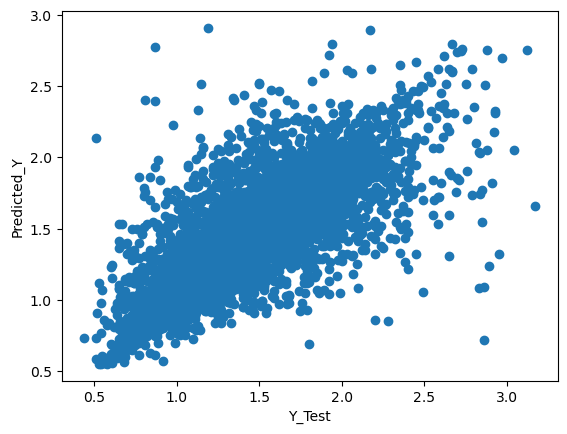

In [77]:
#checking difference between actual and predicted value using graph
import matplotlib.pyplot as plt

# Assuming 'test_y' and 'pred' are already defined
plt.scatter(x=test_y, y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')
plt.show()

In [82]:
#Prediction with region
#importing library for classification prediction

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [87]:
#assign the value of x and y for training and testing phase
#print(df.columns)
# Assuming you've already loaded your DataFrame 'df'
x_c = df.drop(columns=['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'type_organic'])
y_c = df[['region_Atlanta', 'region_BaltimoreWashington', 'region_Boise', 'region_Boston', 'region_BuffaloRochester', 'region_California', 'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth', 'region_Denver', 'region_Detroit', 'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton', 'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis', 'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles', 'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains', 'region_Portland', 'region_RaleighGreensboro', 'region_RichmondNorfolk', 'region_Roanoke', 'region_Sacramento', 'region_SanDiego', 'region_SanFrancisco', 'region_Seattle', 'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast', 'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa', 'region_TotalUS', 'region_West', 'region_WestTexNewMexico']]

#x_c=df.drop(columns=['Date'])
#y_c=df[["region"]]
print(x_c.shape)
print(y_c.shape)

(18249, 53)
(18249, 53)


In [89]:
#Standardize the value of x so that mean will 0 and SD will become 1, and make the data as normal distributed

sc =StandardScaler()
sc.fit_transform(x_c)

x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [102]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set

model = [DecisionTreeClassifier(), KNeighborsClassifier()]
max_accuracy_score = 0

for r_state in range(40,90):
    train_xc, test_xc, train_yc, test_yc =train_test_split(x_c,y_c,random_state=r_state, test_size= 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c=i_c.predict(test_xc)
        ac_score= accuracy_score(test_yc,pre_c) 
        print("accuracy score correspond to random state",r_state,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state =r_state
            final_model =ic

print()
print()
print()
print()
print("max accuracy score correspond to random state",final_state, "is", max_accuracy_score, "and model is",final_model)

accuracy score correspond to random state 40 is 1.0
accuracy score correspond to random state 40 is 1.0
accuracy score correspond to random state 41 is 1.0
accuracy score correspond to random state 41 is 1.0
accuracy score correspond to random state 42 is 1.0
accuracy score correspond to random state 42 is 1.0
accuracy score correspond to random state 43 is 1.0
accuracy score correspond to random state 43 is 1.0
accuracy score correspond to random state 44 is 1.0
accuracy score correspond to random state 44 is 1.0
accuracy score correspond to random state 45 is 1.0
accuracy score correspond to random state 45 is 1.0
accuracy score correspond to random state 46 is 1.0
accuracy score correspond to random state 46 is 1.0
accuracy score correspond to random state 47 is 1.0
accuracy score correspond to random state 47 is 1.0
accuracy score correspond to random state 48 is 1.0
accuracy score correspond to random state 48 is 1.0
accuracy score correspond to random state 49 is 1.0
accuracy sco

In [109]:
##Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc, test_xc, train_yc, test_yc = train_test_split(x_c, y_c, random_state=76, test_size=0.33)
KNC = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 30)}
gridsearch = GridSearchCV(KNC, parameters)
gridsearch.fit(train_xc, train_yc)
best_params = gridsearch.best_params_
print(best_params)

{'n_neighbors': 1}


In [110]:
KNC= KNeighborsClassifier(n_neighbors=1) 
KNC.fit(train_xc, train_yc)
predc= KNC.predict(test_xc)
acu_score= accuracy_score(test_yc, predc) 
print("Accuracy Score :",acu_score*100)

 

Accuracy Score : 100.0


In [111]:
#Calculating the scores of different parameters

score = cross_val_score(KNC,x_c,y_c,cv = 100, scoring='accuracy').mean()
print('Cross_val_score:', score* 100)
print('Mean Score     :',score.mean()*100)
print('STD score      :',score.std())



Cross_val_score: 100.0
Mean Score     : 100.0
STD score      : 0.0
